In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 제공할 데이터

In [2]:
data = pd.read_csv('maryland_accident_dataset.csv')

In [87]:
data.dtypes

CDL_FLAG                  object
CONDITION_CODE            object
EQUIP_PROB_CODE           object
FAULT_FLAG                object
INJ_SEVER_CODE            object
PERSON_ID                 object
REPORT_NO                 object
SAF_EQUIP_CODE            object
SEX_CODE                  object
VEHICLE_ID                object
LIGHT_CODE                object
JUNCTION_CODE             object
COLLISION_TYPE_CODE       object
SURF_COND_CODE            object
LANE_CODE                 object
RD_COND_CODE              object
RD_DIV_CODE               object
WEATHER_CODE              object
C_M_ZONE_FLAG             object
DAMAGE_CODE               object
MOVEMENT_CODE             object
BODY_TYPE_CODE            object
HIT_AND_RUN_FLAG          object
AREA_DAMAGED_CODE_MAIN    object
AGE                       object
RUSH_HOUR                 object
WEEKEND                   object
ACCIDENT_TYPE              int32
dtype: object

In [3]:
data[:5]

,CDL_FLAG,CONDITION_CODE,EQUIP_PROB_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,REPORT_NO,SAF_EQUIP_CODE,SEX_CODE,...,SIGNAL_FLAG,C_M_ZONE_FLAG,DAMAGE_CODE,MOVEMENT_CODE,COMMERCIAL_FLAG,BODY_TYPE_CODE,HIT_AND_RUN_FLAG,AREA_DAMAGED_CODE_MAIN,TIME,AGE
0,N,Apparently Normal,No Misuse,N,No Injury,a33f1d87-624c-4608-a11e-84d03ecd067a,D,AB36760008,Shoulder/Lap Belt(s),M,...,N,N,Functional,Starting From Parked,N,Passenger Car,Y,Six o'clock,2015-01-24 01:40:00,42.0
1,N,Apparently Normal,No Misuse,N,No Injury,a6c44772-fd8f-47d5-95ba-25c143766037,D,AC1022000M,Shoulder/Lap Belt(s),M,...,N,N,Superficial,Moving Constant Speed,N,(Sport) Utility Vehicle,N,Six o'clock,2015-03-30 16:19:00,53.0
2,N,Apparently Normal,No Misuse,N,No Injury,517a3a6f-3d0d-4cda-8e42-836efaf5f55d,D,AC2017000W,Shoulder/Lap Belt(s),F,...,N,N,Disabling,Stopped in Traffic Lane,N,Passenger Car,N,Six o'clock,2015-03-26 11:13:00,44.0
3,N,Apparently Normal,No Misuse,N,Possible Incapacitating Injury,9dfe84cd-9dce-4aeb-9618-e11af38d88e1,D,AC2017000W,Shoulder/Lap Belt(s),F,...,N,N,Disabling,Stopped in Traffic Lane,N,Passenger Car,N,Six o'clock,2015-03-26 11:13:00,48.0
4,N,Apparently Normal,No Misuse,Y,No Injury,72c93d16-1bd8-4503-8cbf-3f8fb40d19e3,D,ADF451000C,Shoulder/Lap Belt(s),F,...,N,N,Superficial,Moving Constant Speed,N,Passenger Car,N,Twelve o'clock,2015-02-23 13:45:00,28.0


# 분석 모범답안

#### 각 변수가 가질 수 있는 값 확인

In [7]:
for col in data.columns:
    print(col)
    print(str(data[col].unique()) + '\n')

CDL_FLAG
['N' 'Y']

CONDITION_CODE
['Apparently Normal' 'Had Been Drinking'
 'Influenced by Medications and/or Drugs and/or Alcohol' 'Fatigued Fainted'
 'Using Drugs' 'Ill' 'Emotional Depressed Angry Disturbed'
 'Other Handicaps' 'Apparently Asleep' 'Physical Defects']

EQUIP_PROB_CODE
['No Misuse' 'Belt(s) Misused' 'Air Bag Failed' 'Facing Wrong Way'
 'Belts/Anchors Broken' 'Not Strapped Right' 'Size/Type Improper'
 'Not Anchored Right' 'Anchor Not Secure']

FAULT_FLAG
['N' 'Y']

INJ_SEVER_CODE
['No Injury' 'Possible Incapacitating Injury' 'Non-incapacitating Injury'
 'Incapacitating/Disabled Injury' 'Fatal Injury']

PERSON_ID
['a33f1d87-624c-4608-a11e-84d03ecd067a'
 'a6c44772-fd8f-47d5-95ba-25c143766037'
 '517a3a6f-3d0d-4cda-8e42-836efaf5f55d' ...,
 '63529935-542d-4c69-af1f-1b3e49894090'
 '400dc255-6c26-4e47-9f75-920439556f0b'
 '6dbbc5b4-3922-4726-ae9f-d4140e986ea4']

PERSON_TYPE
['D']

REPORT_NO
['AB36760008' 'AC1022000M' 'AC2017000W' ..., 'ADI5630003' 'HM0146000D'
 'MCP1519000S']



#### AGE 범주형으로 변환

In [10]:
data.AGE = data.AGE.apply(lambda x : str(int(x / 10) * 10))

#### 시간 변수 전처리

In [11]:
data.TIME = pd.to_datetime(data.TIME)

In [12]:
hour = data.TIME.apply(lambda x : x.hour)
for i in range(len(hour)):
    x = hour[i]
    if x in [8,9,16,17,18]:
        hour[i] = 'Y'
    else:
        hour[i] = 'N'
data['RUSH_HOUR'] = hour

In [13]:
day = data.TIME.apply(lambda x: x.weekday_name)
for i in range(len(day)):
    x = day[i]
    if x in ['Saturday', 'Sunday']:
        day[i] = 'Y'
    else:
        day[i] = 'N'
data['WEEKEND'] = day

In [14]:
data.drop('TIME', axis=1, inplace=True)

In [15]:
data.dtypes

CDL_FLAG                  object
CONDITION_CODE            object
EQUIP_PROB_CODE           object
FAULT_FLAG                object
INJ_SEVER_CODE            object
PERSON_ID                 object
REPORT_NO                 object
SAF_EQUIP_CODE            object
SEX_CODE                  object
VEHICLE_ID                object
LIGHT_CODE                object
JUNCTION_CODE             object
COLLISION_TYPE_CODE       object
SURF_COND_CODE            object
LANE_CODE                 object
RD_COND_CODE              object
RD_DIV_CODE               object
WEATHER_CODE              object
C_M_ZONE_FLAG             object
DAMAGE_CODE               object
MOVEMENT_CODE             object
BODY_TYPE_CODE            object
HIT_AND_RUN_FLAG          object
AREA_DAMAGED_CODE_MAIN    object
AGE                       object
RUSH_HOUR                 object
WEEKEND                   object
dtype: object

In [16]:
data.shape

(47443, 27)

## 사고의 유형 분석

### 사고를 (1)도로 특성, (2)날씨, (3)시간대 측면에서 유형화

#### 현재 데이터의 인스턴스는 '운전자'
#### (1) - (3)의 변수들을 바탕으로 사고 정보의 테이블을 생성

In [17]:
accident_data = data.drop_duplicates(subset='REPORT_NO')

In [18]:
accident_data.columns

Index(['CDL_FLAG', 'CONDITION_CODE', 'EQUIP_PROB_CODE', 'FAULT_FLAG',
       'INJ_SEVER_CODE', 'PERSON_ID', 'REPORT_NO', 'SAF_EQUIP_CODE',
       'SEX_CODE', 'VEHICLE_ID', 'LIGHT_CODE', 'JUNCTION_CODE',
       'COLLISION_TYPE_CODE', 'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_CODE',
       'RD_DIV_CODE', 'WEATHER_CODE', 'C_M_ZONE_FLAG', 'DAMAGE_CODE',
       'MOVEMENT_CODE', 'BODY_TYPE_CODE', 'HIT_AND_RUN_FLAG',
       'AREA_DAMAGED_CODE_MAIN', 'AGE', 'RUSH_HOUR', 'WEEKEND'],
      dtype='object')

In [19]:
accident_vars = ['REPORT_NO','LIGHT_CODE','JUNCTION_CODE',
                'SURF_COND_CODE','LANE_CODE','RD_COND_CODE',
                 'RD_DIV_CODE', 'WEATHER_CODE','C_M_ZONE_FLAG',
                 'RUSH_HOUR','WEEKEND']

In [20]:
accident_data = accident_data[accident_vars].reset_index(drop=True)

In [21]:
accident_data.shape

(29602, 11)

#### 범주형 변수들을 더미 변수로 변경

In [22]:
report_no = accident_data.REPORT_NO
accident_data = pd.get_dummies(accident_data.drop('REPORT_NO', axis = 1))
accident_data['REPORT_NO'] = report_no

In [23]:
accident_data.shape

(29602, 61)

### 클러스터링

In [24]:
from sklearn.cluster import KMeans

In [25]:
n_cluster= 5

In [49]:
kmeans = KMeans(n_clusters=n_cluster)

In [50]:
cluster_label = kmeans.fit_predict(accident_data.drop('REPORT_NO', axis=1))

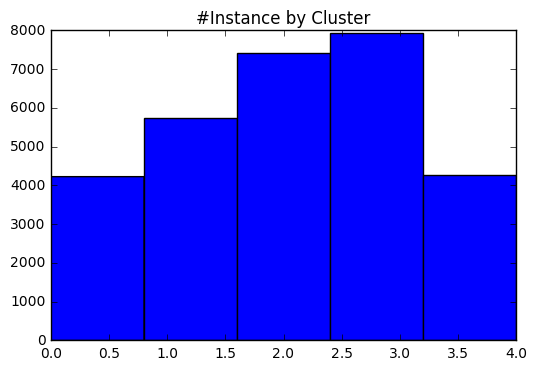

In [51]:
plt.hist(cluster_label, bins=n_cluster)
plt.title('#Instance by Cluster')

### 각 클러스터의 특징 추출

In [52]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import operator

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

In [54]:
dt = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes = n_cluster)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(accident_data.drop('REPORT_NO', axis=1),
                                                    cluster_label,test_size=0.3)

In [60]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=5,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
print('Training Accuracy', accuracy_score(y_train,dt.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test,dt.predict(X_test)))

Training Accuracy 0.943342502775
Test Accuracy 0.942461434523


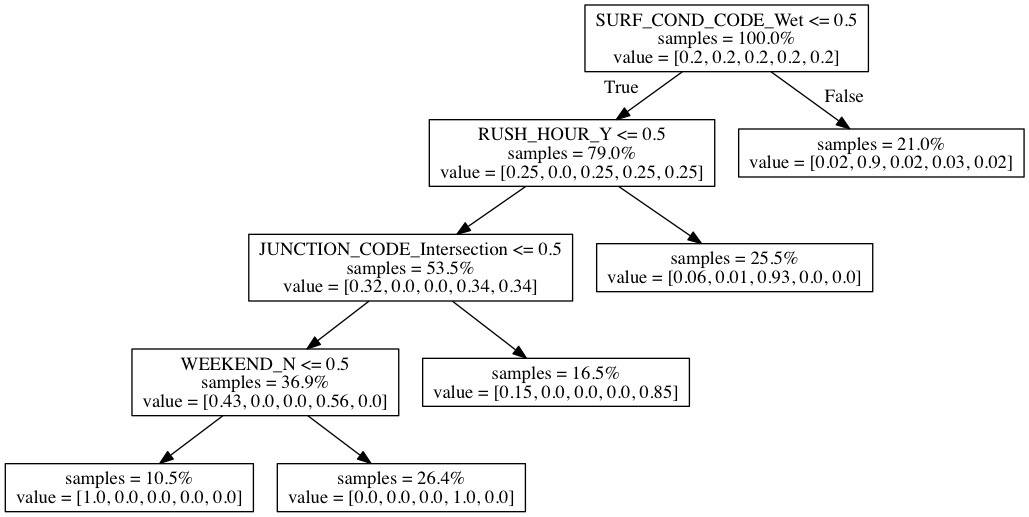

In [62]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=X_train.columns,\
               impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree.jpeg')
Image(filename='tree.jpeg')

## 클러스터 레이블을 '사고의 유형'으로 정의

In [63]:
accident_type_lookup = pd.DataFrame()
accident_type_lookup['REPORT_NO'] = accident_data['REPORT_NO']
accident_type_lookup['ACCIDENT_TYPE'] = cluster_label

In [64]:
data = pd.merge(data, accident_type_lookup, how='left', on='REPORT_NO')

## 사고의 유형을 세분화

### 사고의 유형 별로, '과실 상황'을 유형화

#### 과실이 있는 운전자의, 사고 당시 주행 상황과 충돌 유형에 대한 변수

In [65]:
fault_vars = ['HIT_AND_RUN_FLAG', 'MOVEMENT_CODE', 'BODY_TYPE_CODE', 'COLLISION_TYPE_CODE']

In [66]:
fault_drivers = data.loc[data.FAULT_FLAG == 'Y'].reset_index(drop=True)
fault_drivers = fault_drivers[fault_vars + ['REPORT_NO', 'ACCIDENT_TYPE']]

report_no = fault_drivers.REPORT_NO
accident_type = fault_drivers.ACCIDENT_TYPE

fault_drivers = pd.get_dummies(fault_drivers.drop('REPORT_NO',axis=1).drop('ACCIDENT_TYPE',axis=1))
fault_drivers['REPORT_NO'] = report_no
fault_drivers['ACCIDENT_TYPE'] = accident_type

#### 과실로 인해 발생한 피해에 대한 변수

In [67]:
accident_result_vars = ['DAMAGE_CODE', 'INJ_SEVER_CODE']

In [68]:
accident_results = data[accident_result_vars + ['REPORT_NO']]

report_no = accident_results.REPORT_NO

accident_results = pd.get_dummies(accident_results.drop('REPORT_NO',axis=1))
accident_results['REPORT_NO'] = report_no

accident_results = accident_results.groupby('REPORT_NO').agg('sum').reset_index()

In [69]:
fault_results = pd.merge(fault_drivers, accident_results, on = 'REPORT_NO', how = 'left')

In [70]:
results_vars = [col for col in fault_results.columns 
          if ('DAMAGE_CODE' in col) or ('INJ_SEVER_CODE') in col]

### 과실 상황의 유형화를 위해 클러스터링 수행

In [71]:
type0 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 0].reset_index(drop=True)
type1 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 1].reset_index(drop=True)
type2 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 2].reset_index(drop=True)
type3 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 3].reset_index(drop=True)
type4 = fault_drivers.loc[fault_drivers.ACCIDENT_TYPE == 4].reset_index(drop=True)

In [72]:
types = [type0,type1,type2,type3,type4]

#### 각 사고 유형 별, 과실 유형의 개수를 4개로 가정

In [73]:
n_clusters_type_detail = 4

In [74]:
km0 = KMeans(n_clusters=n_clusters_type_detail)
km1 = KMeans(n_clusters=n_clusters_type_detail)
km2 = KMeans(n_clusters=n_clusters_type_detail)
km3 = KMeans(n_clusters=n_clusters_type_detail)
km4 = KMeans(n_clusters=n_clusters_type_detail)

In [75]:
kms = [km0,km1,km2,km3,km4]

In [76]:
dt0 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt1 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt2 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt3 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)
dt4 = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=n_clusters_type_detail)

In [77]:
dts = [dt0,dt1,dt2,dt3,dt4]

In [78]:
for i in range(0, n_cluster):
    
    print('Accident Type : ' + str(i))
    
    cluster_type_detail_label = kms[i].fit_predict(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                            drop('REPORT_NO',axis=1))   
    
    X_tr, X_te, y_tr, y_te = train_test_split(types[i].drop('ACCIDENT_TYPE',axis=1).\
                                                       drop('REPORT_NO',axis=1),
                                              cluster_type_detail_label,test_size = 0.2)
    dts[i].fit(X_tr, y_tr)

    types[i]['ACCIDENT_TYPE_DETAIL'] = cluster_type_detail_label

    print('Training Accuracy', accuracy_score(y_tr,dts[i].predict(X_tr)))
    print('Test Accuracy', accuracy_score(y_te,dts[i].predict(X_te)))

Accident Type : 0
Training Accuracy 0.8901453958
Test Accuracy 0.907915993538
Accident Type : 1
Training Accuracy 0.95530726257
Test Accuracy 0.955319148936
Accident Type : 2
Training Accuracy 0.901077586207
Test Accuracy 0.911206896552
Accident Type : 3
Training Accuracy 0.908728493496
Test Accuracy 0.906040268456
Accident Type : 4
Training Accuracy 1.0
Test Accuracy 1.0


### 대분류 0

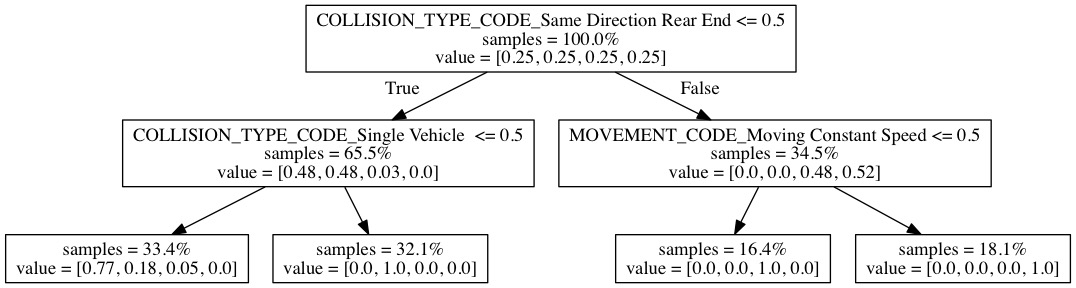

In [79]:
dot_data = StringIO()
export_graphviz(dts[0], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type0.jpeg')
Image(filename='tree_type0.jpeg')

### 대분류 1

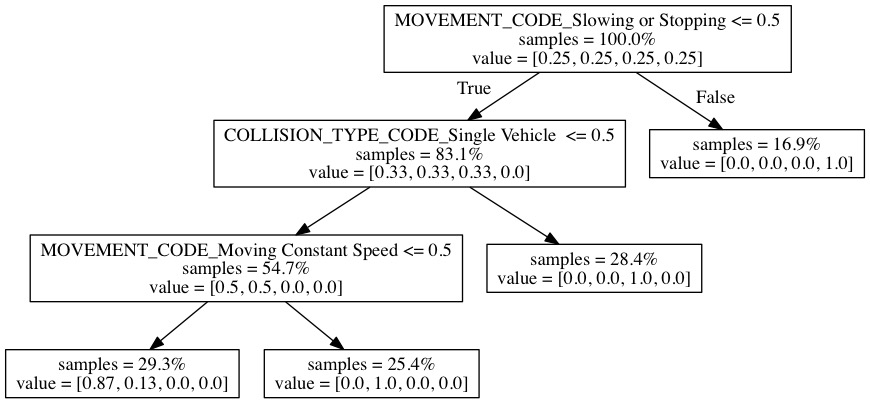

In [80]:
dot_data = StringIO()
export_graphviz(dts[1], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type1.jpeg')
Image(filename='tree_type1.jpeg')

### 대분류 2

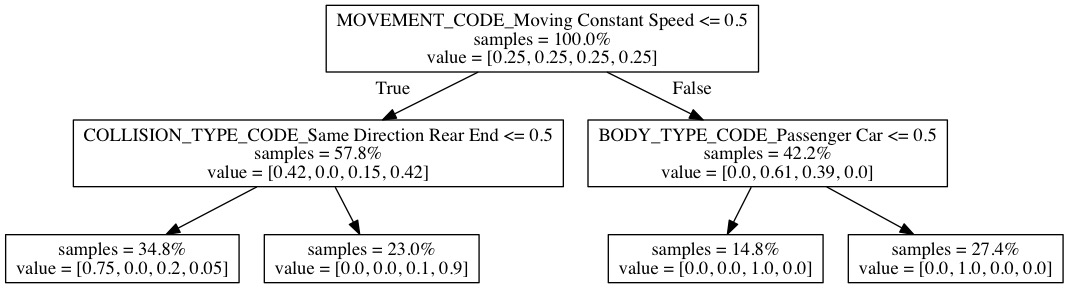

In [81]:
dot_data = StringIO()
export_graphviz(dts[2], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type2.jpeg')
Image(filename='tree_type2.jpeg')

### 대분류 3

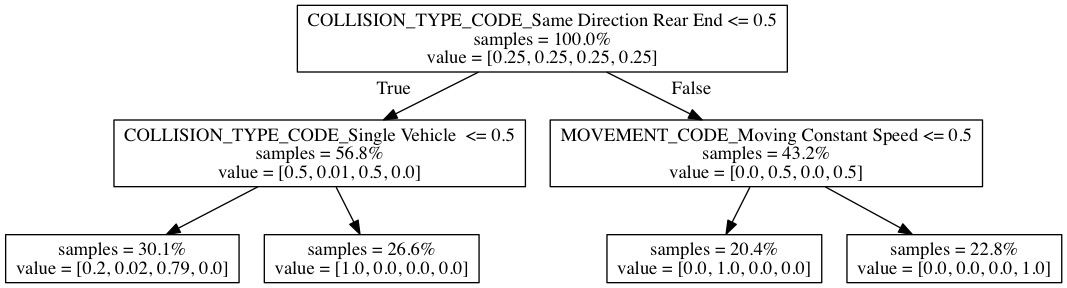

In [82]:
dot_data = StringIO()
export_graphviz(dts[3], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type3.jpeg')
Image(filename='tree_type3.jpeg')

### 대분류 4

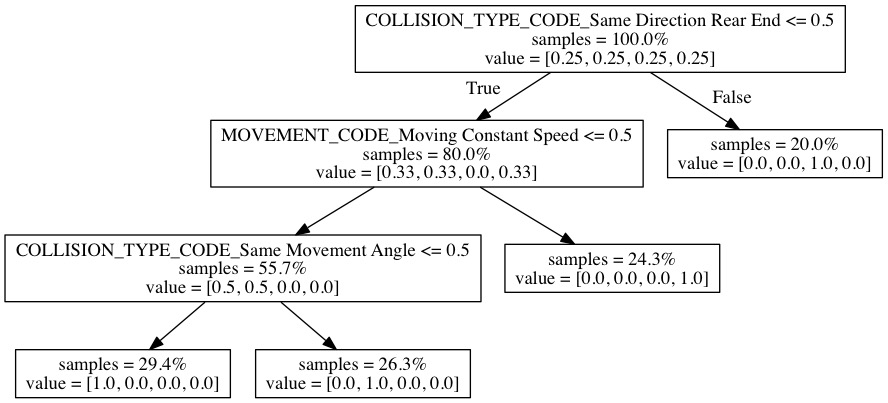

In [83]:
dot_data = StringIO()
export_graphviz(dts[4], out_file=dot_data, feature_names=X_tr.columns,\
                impurity=False, proportion=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg('tree_type4.jpeg')
Image(filename='tree_type4.jpeg')

### 과실 유형 별 피해 규모

In [84]:
final_data=type0.append(type1).append(type2).append(type3).append(type4).reset_index(drop=True)

In [85]:
final_data = pd.merge(final_data, accident_results, on = 'REPORT_NO', how = 'left')

In [86]:
final_data.groupby(['ACCIDENT_TYPE','ACCIDENT_TYPE_DETAIL']).agg('mean')[results_vars]

DAMAGE_CODE_Destroyed  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                          
0             0                                  0.160057   
              1                                  0.187257   
              2                                  0.061798   
              3                                  0.089789   
1             0                                  0.089679   
              1                                  0.100284   
              2                                  0.130337   
              3                                  0.057990   
2             0                                  0.100379   
              1                                  0.116625   
              2                                  0.088213   
              3                                  0.038014   
3             0                                  0.159772   
              1                                  0.050971   
              2                                  0.084328   
              3                                  0.096182   
4             0                                  0.100313   
              1                                  0.126002   
              2                                  0.065705   
              3                                  0.152201   

                                    DAMAGE_CODE_Disabling  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                          
0             0                                  0.947592   
              1                                  0.654235   
              2                                  0.707865   
              3                                  0.859155   
1             0                                  1.019459   
              1                                  0.907539   
              2                                  0.676404   
              3                                  0.712629   
2             0                                  0.987374   
              1                                  0.893921   
              2                                  0.698859   
              3                                  0.719938   
3             0                                  0.686163   
              1                                  0.671521   
              2                                  0.736675   
              3                                  0.896476   
4             0                                  0.879833   
              1                                  1.076747   
              2                                  0.604167   
              3                                  1.049057   

                                    DAMAGE_CODE_Functional  \
ACCIDENT_TYPE ACCIDENT_TYPE_DETAIL                           
0             0                                   0.460340   
              1                                   0.170940   
              2                                   0.672285   
              3                                   0.686620   
1             0                                   0.532995   
              1                                   0.583926   
              2                                   0.104869   
              3                                   0.643041   
2             0                                   0.461490   
              1                                   0.522953   
              2                                   0.537643   
              3                                   0.718386   
3             0                                   0.184974   
              1                                   0.670712   
              2                                   0.535402   
              3                                   0.670338   
4             0                                   0.383490   
              1                                   0.504009   
              2                                   0.623397   
              3                                 

In [59]:
final_data.to_csv('accident_types_and_fatality.csv',index=False)